# Image Analysis

In this notebook we will introduce the concepts of data extraction and data manipulation of visual elements such as charts, images and tables using prompts and the OpenAI models. In this notebook, we will experiment with different elements and different prompts, and we will see how we can extract information in different formats using the very capable GPT-4 family of models. 


### Python Imports


In [8]:
%load_ext autoreload
%autoreload 2


import sys
sys.path.append('..\\code')


import os
from dotenv import load_dotenv
load_dotenv()

from IPython.display import display, Markdown, HTML
from PIL import Image
from doc_utils import *


def show_img(img_path, width = None):
    if width is not None:
        display(HTML(f'<img src="{img_path}" width={width}>'))
    else:
        display(Image.open(img_path))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Make sure we have the OpenAI Models information

We will need the GPT-4-Turbo and GPT-4-Vision models for this notebook.

When running the below cell, the values should reflect the OpenAI reource you have created in the `.env` file.

In [ ]:
model_info = {
        'AZURE_OPENAI_RESOURCE': os.environ.get('AZURE_OPENAI_RESOURCE'),
        'AZURE_OPENAI_KEY': os.environ.get('AZURE_OPENAI_KEY'),
        'AZURE_OPENAI_MODEL_VISION': os.environ.get('AZURE_OPENAI_MODEL_VISION'),
        'AZURE_OPENAI_MODEL': os.environ.get('AZURE_OPENAI_MODEL'),
}

model_info


## Visual Elements Analysis

In this section, we will analyze different visual elements with different prompts, and check what outputs we will get. 

The below table is really a complex one. It is in reality two tables, that are placed vertically together, but share the same column types.

In [18]:
print("We will be analyzing the following Balance Sheet.")

show_img('sample_data/4_table_1.png', width=350)

We will be analyzing the following Balance Sheet.


### Markdown Format

Markdown is the easiest format to represent a table in. Let's try to generate Markdown format from that image. 

What we will do, is to send this image to GPT-4V, and then ask it in the prompt to return for us the Markdown format. 



In [29]:

table_markdown_description_prompt = """"

please reproduce the table in Markdown format, and output the code. As a chain of thought: 

    1. think and describe the list of headers, Whether those are column headers, or row headers. 
    2. as a next step, if there are composite headers, then for each header indicate the level of hierarchy with a number. If there are composite headers, generate first a list of sets of hierarchical headers, and then several lists of values for every column or row as input for 'data' when creating the Markdown representation - **make sure** to capture each and every value of the data and do **NOT** miss anything. If the table is flat and there are no composite headers, then do not generate the hierarchical headers.
    3. then make sure to capture ALL the values of the data, and do not miss any value. Make a list of lists of values for every column or row 
    4. As a final step, generate the Markdown output that would describe the table. Please output **ONLY** the Markdown, and nothing else, with no explanation text. 
    5. Make sure that the Markdown table is representative of the table in the image. Once generated, do two more passes on the code to validate, quality control, refine and address any issues.
    6. If there are more than one table in the image, then generate Markdown for each separately.

Output only the Markdown.

"""

result, description = call_gpt4v('sample_data/4_table_1.png', gpt4v_prompt = table_markdown_description_prompt, temperature = 0.2, model_info=model_info)
print(f"Status: {description}")
Markdown(extract_markdown(result))


15.03.2024_17.37.01 :: Start of GPT4V Call to process file(s) ['sample_data/1_table_1.png'] with model: https://oai-tst-sweden.openai.azure.com/ 
endpoint https://oai-tst-sweden.openai.azure.com/openai/deployments/gpt4v/extensions/chat/completions?api-version=2023-12-01-preview

15.03.2024_17.37.11 :: End of GPT4V Call to process file(s) ['sample_data/1_table_1.png'] with model: https://oai-tst-sweden.openai.azure.com/ 
Status: Image was successfully explained, with Status Code: 200



| Assets                           | Amount (USD) |
|----------------------------------|--------------|
| Cash and Cash Equivalents        | $500,000     |
| Accounts Receivable              | $300,000     |
| Inventory                        | $400,000     |
| Prepaid Expenses                 | $100,000     |
| Property, Plant, and Equipment   | $1,200,000   |
| **Total Assets**                 | **$2,500,000**   |
|                                  |              |
| Liabilities and Equity           | Amount (USD) |
|----------------------------------|--------------|
| Accounts Payable                 | $300,000     |
| Accrued Liabilities              | $200,000     |
| Long-term Debt                   | $1,700,000   |
| **Total Liabilities**            | **$2,200,000**   |
| Equity                           | $300,000     |
| **Total Liabilities and Equity** | **$2,500,000**   |


### Code Format

Python code is the second format we will experiment with to reprenset a table in. Let's try to generate a Python Pandas Dataframe from that image. 

What we will do, is to send this image to GPT-4V, and then ask it in the prompt to return for us the Pandas Dataframe format. 



In [42]:
table_code_description_prompt = """"

please reproduce the table in python code format, and output the code. As a chain of thought: 

    1. think and describe the list of headers, Whether those are column headers, or row headers. 
    2. as a next step, if there are composite headers, then for each header indicate the level of hierarchy with a number. If there are composite headers, generate first a list of sets row_indices as input to pd.MultiIndex.from_tuples, and then several lists of values for every column or row as input for 'data' when creating the DataFrame - **make sure** to capture each and every value of the data and do **NOT** miss anything. If the table is flat and there are no composite headers, then do not use pd.MultiIndex.
    3. then make sure to capture ALL the values of the data, and do not miss any value. Make a list of lists of values for every column or row 
    4. As a final step, generate the python code that would describe the table. Please output **ONLY** the code, and nothing else, with no explanation text. 
    5. Make sure that the code is synctactically correct, and that it can be run. Once generated, do two more passes on the code to validate, quality control, refine and address any issues.
    6. In the generated code, give the dataframe a unique code variable name, like df_{purpose of the table}_{random number of 6 digits}. For example, if the table is about seasonal sales in 2023, then the dataframe name could be df_seasonal_sales_in_2023_3927364. This is to make sure that the dataframe name is unique and does not conflict with other dataframes in the code.
    7. If there are more than one table in the image, then generate a dataframe for each separately.

Output only the code.

"""

result, description = call_gpt4v('sample_data/4_table_1.png', gpt4v_prompt = table_code_description_prompt, temperature = 0.2, model_info=model_info)
print(f"Status: {description}")
Markdown(result)


15.03.2024_17.40.44 :: Start of GPT4V Call to process file(s) ['sample_data/1_table_1.png'] with model: https://oai-tst-sweden.openai.azure.com/ 
endpoint https://oai-tst-sweden.openai.azure.com/openai/deployments/gpt4v/extensions/chat/completions?api-version=2023-12-01-preview

15.03.2024_17.40.52 :: End of GPT4V Call to process file(s) ['sample_data/1_table_1.png'] with model: https://oai-tst-sweden.openai.azure.com/ 
Status: Image was successfully explained, with Status Code: 200


```python
import pandas as pd

# Unique dataframe name
df_financial_statement_834920 = pd.DataFrame({
    'Assets': ['Cash and Cash Equivalents', 'Accounts Receivable', 'Inventory', 'Prepaid Expenses', 'Property, Plant, and Equipment', 'Total Assets', '', 'Liabilities and Equity', 'Accounts Payable', 'Accrued Liabilities', 'Long-term Debt', 'Total Liabilities', 'Equity', 'Total Liabilities and Equity'],
    'Amount (USD)': ['$500,000', '$300,000', '$400,000', '$100,000', '$1,200,000', '$2,500,000', '', '', '$300,000', '$200,000', '$1,700,000', '$2,200,000', '$300,000', '$2,500,000']
})

df_financial_statement_834920
```

### Run Generated Code locally

Try to run the generated Python code locally and check the output. Sometimes the generated code by GPT4V does contain errors, espcially if the table has merged cells or doesn't have a straightforward layout.

In [50]:
ret_dict = {} 

code = extract_code(result)
exec(code, globals(), ret_dict)

for key in ret_dict:
    if key.startswith('df'):
        display(ret_dict[key])

,Assets,Amount (USD)
0,Cash and Cash Equivalents,"$500,000"
1,Accounts Receivable,"$300,000"
2,Inventory,"$400,000"
3,Prepaid Expenses,"$100,000"
4,"Property, Plant, and Equipment","$1,200,000"
5,Total Assets,"$2,500,000"
6,,
7,Liabilities and Equity,
8,Accounts Payable,"$300,000"
9,Accrued Liabilities,"$200,000"


### Mermaid Format

Now we will experiment with relationship diagrams, like organizational charts or process flow diagrams.

This is the image we will be analyzing


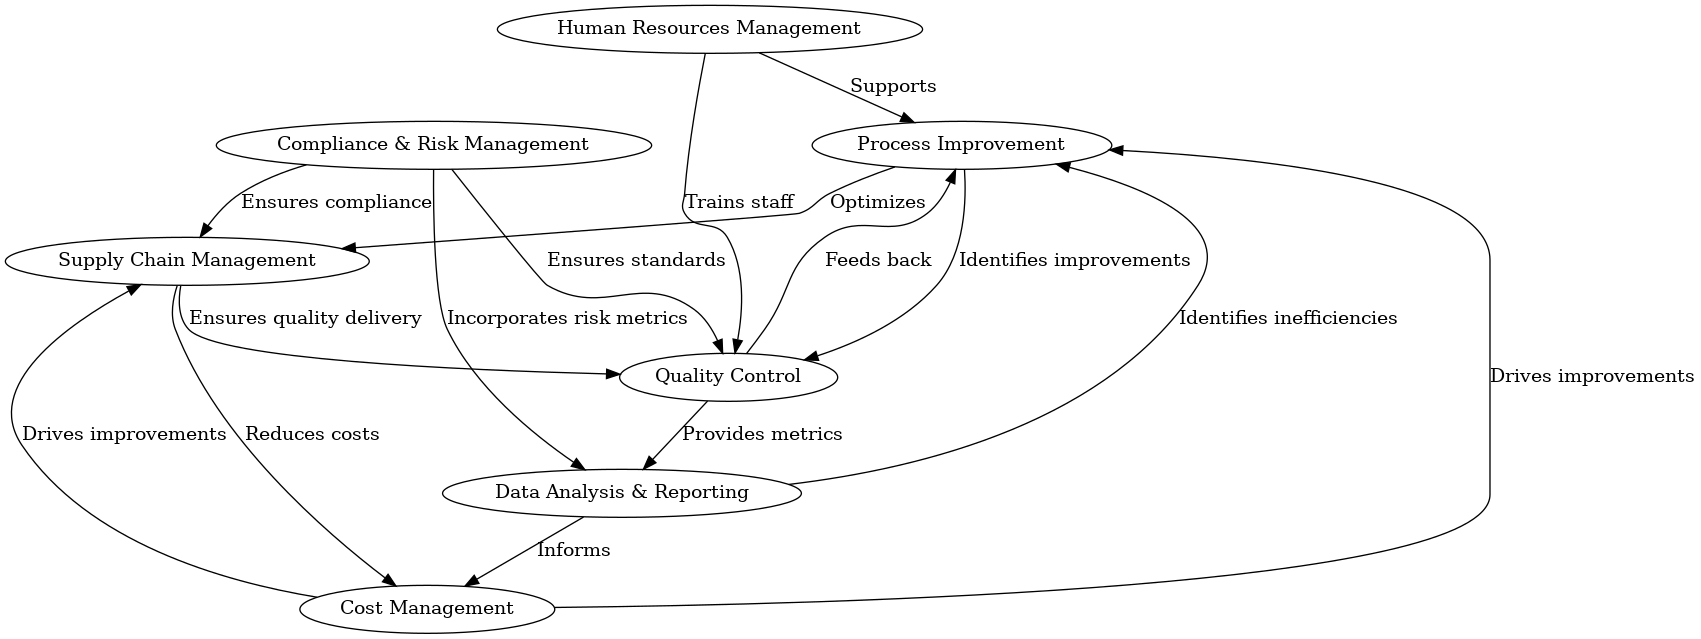

In [7]:
print("This is the image we will be analyzing")

show_img("sample_data/4_operations_interdependencies.png")

In [53]:
image_description_prompt = """
Please describe the attached image in full details, with a description of each object in the image. If the attached is a screenshot of a document page with multiple images in it, then you **MUST* repeat the below steps per image. 
Try to answer the following questions:

    1. What information does this image convey? 
    2. Given the below text context (Previous Page, Current Page, Next Page), how does this image add to the information?
    3. If this image is a natural image (people, scenery, city landscape, offices, etc..), describe all the objects in that image, and describe the background and setting of the image. 
    4. If this image is an organization chart, a flowchart, a process chart, or any chart that conveys relationships and progress in timeline or execution, please generate the text description of this chart as accurately as possible, as well as generate the Mermaid code to capture the full information in the chart. As an accurate and faithful assistant, you **MUST** be able to capture all the information in the chart. When generating Mermaid code, do not generate paranthesis in the node names inside the code, because it might throw an error. 
    5. If this image is an image of a numerical chart, like a line chart or a bar chart or a pie chart, generate a Markdown table that accurately represents the quantities being displayed. Describe in text the axes labels, the trend lines, the exact amounts, and so on and so forth. Be very descriptive when it comes to the numerical quantities: e.g. "the sales in May 2022 was $4.2 million", or "the market share of the X product is 22%", etc.. If this is a line chart, make sure that the values in the chart are aligned with the labels on the axes (X and Y are correct vs axes). You **MUST** output a Markdown representation of the data in a Markdown codeblock delimited by '```markdown' and '```'. The numbers **must absolutely** be accurate. Also you **MUST** output the Python code that enables the creation of the Pandas Dataframe of the data in the chart, but do not compute the data. After extracing the data, double check your results to make sure that the Markdown table and Python code are accurate and representative of the data in the image. In the generated code, give the dataframe a unique code variable name, like df_{purpose of the table}_{random number of 6 digits}. For example, if the table is about seasonal sales in 2023, then the dataframe name could be df_seasonal_sales_in_2023_3927364. This is to make sure that the dataframe name is unique and does not conflict with other dataframes in the code.
    6. For all other cases, describe what's in the image as elaborately and as detailed as possible. 
    7. If the image is that of a table, try to describe the table in full details, with a description of each column and row in the table. For each column, describe the header name, the data type and the purpose of the data and the column. If the table is a numerical table, try to describe the purpose and the trends of the different columns and rows in that table. In addition to that, output the table in Markdown format to be able to represent it in text. If the table is not clearly labeled, give the table a unique Title, based on the context supplied and the purpose of the table. If there are more than one table in the image, then describe each table separately. Please output the Markdown in a Markdown codeblock delimited by '```markdown' and '```'.
    8. Try to guess the purpose of why the authors have included this image in the document.
    9. If the attached is a screenshot of a document page with multiple images in it, then you **MUST* repeat the above steps per image and generate it all in the same output. 
    10. If any point in the above is not applicable, you do **NOT** have to say "Not applicable" or "Not applicable as this is not ...", you can just skip that point. No need for needless text or explanations to be generated.

"""

result, description = call_gpt4v('sample_data/4_operations_interdependencies.png', gpt4v_prompt = image_description_prompt, temperature = 0.2, model_info=model_info)
print(f"Status: {description}")
Markdown(result)



15.03.2024_17.55.46 :: Start of GPT4V Call to process file(s) ['sample_data/1_operations_interdependencies.png'] with model: https://oai-tst-sweden.openai.azure.com/ 
endpoint https://oai-tst-sweden.openai.azure.com/openai/deployments/gpt4v/extensions/chat/completions?api-version=2023-12-01-preview

15.03.2024_17.56.00 :: End of GPT4V Call to process file(s) ['sample_data/1_operations_interdependencies.png'] with model: https://oai-tst-sweden.openai.azure.com/ 
Status: Image was successfully explained, with Status Code: 200


The image is a flowchart that outlines various aspects of management and their interconnections. The central concept is "Human Resources Management," which supports "Process Improvement," which in turn optimizes and identifies improvements. "Process Improvement" feeds back into "Supply Chain Management," "Quality Control," and "Data Analysis & Reporting," indicating a cyclical relationship where each aspect contributes to and enhances the others. "Supply Chain Management" ensures standards and quality delivery, incorporates risk metrics, and feeds back into "Quality Control." "Quality Control" drives improvements, reduces costs, provides metrics, and informs "Data Analysis & Reporting." "Data Analysis & Reporting" informs "Cost Management," which also drives improvements. The flowchart shows a complex system of feedback loops where each component is both a contributor to and a beneficiary of the process improvement cycle.

Here is the Mermaid code to represent the flowchart:

```mermaid
graph LR
    HRM(Human Resources Management) -->|Supports| PI(Process Improvement)
    PI -->|Optimizes| SCM(Supply Chain Management)
    PI -->|Feeds back| QC(Quality Control)
    PI -->|Identifies improvements| SCM
    SCM -->|Ensures standards| QC
    SCM -->|Ensures quality delivery| QC
    SCM -->|Incorporates risk metrics| QC
    QC -->|Drives improvements| SCM
    QC -->|Reduces costs| SCM
    QC -->|Provides metrics| DAR(Data Analysis & Reporting)
    DAR -->|Informs| CM(Cost Management)
    CM -->|Drives improvements| PI
```

The purpose of including this image in the document is likely to visually represent the interconnected nature of various management functions within an organization. It emphasizes the importance of continuous improvement and the cyclical process of feedback and optimization across different departments. This visual representation can help readers understand the dynamic and interdependent relationships between different management practices.

### Render the Mermaid code

To render the above generated Mermaid Code, please copy the above Mermaid script block, visit [mermaid.live](https://mermaid.live) in your browser, and paste the copied script in your browser. 

The image should be rendered immediately.

<br/>

![Mermaid Representation](../images/flowchart.png)

## Read a Powerpoint Slide

In [16]:
print("We will be analyzing the following Powerpoint slide.")

# Create a directory to store the outputs
work_dir = "sample_data/pdf_outputs_slide"
os.makedirs(work_dir, exist_ok=True)

# Load a sample PDF document

def read_pdf(pdf_doc):
    doc = fitz.open(pdf_doc)
    print(f"PDF File {os.path.basename(pdf_doc)} has {len(doc)} pages.")
    return doc

def nb_extract_pages_as_png_files(doc):
    png_files = []
    for page in doc:
        page_num = page.number
        img_path = f"{work_dir}/page_{page_num}.png"
        page_pix = page.get_pixmap(dpi=300)
        page_pix.save(img_path)
        print(f"Page {page_num} saved as {img_path}")
        png_files.append(img_path)
    
    return png_files

pdf_doc = "sample_data/1_slide_2.pdf"
doc = read_pdf(pdf_doc)
png_files = nb_extract_pages_as_png_files(doc)  

show_img(png_files[0], width=600)

We will be analyzing the following Powerpoint slide.
PDF File 1_slide_2.pdf has 1 pages.
Page 0 saved as sample_data/pdf_outputs_slide/page_0.png


In [17]:
result, description = call_gpt4v(png_files[0], gpt4v_prompt = image_description_prompt, temperature = 0.2, model_info=model_info)
print(f"Status: {description}")
Markdown(result)


16.03.2024_16.58.07 :: Start of GPT4V Call to process file(s) ['sample_data/pdf_outputs_slide/page_0.png'] with model: https://oai-tst-sweden.openai.azure.com/ 
endpoint https://oai-tst-sweden.openai.azure.com/openai/deployments/gpt4v/extensions/chat/completions?api-version=2023-12-01-preview

16.03.2024_16.58.31 :: End of GPT4V Call to process file(s) ['sample_data/pdf_outputs_slide/page_0.png'] with model: https://oai-tst-sweden.openai.azure.com/ 
Status: Image was successfully explained, with Status Code: 200


The image is a composite of graphical and textual information, primarily focused on conveying the market position of a combined entity in the infrastructure private markets business. It consists of a title, three donut charts, a table, and a footer note.

1. The title "Combination creates second-largest global infrastructure private markets business" suggests that a merger or partnership has resulted in the creation of a significant entity in the infrastructure market.

2. The first donut chart represents BlackRock Infrastructure, labeled as #14 by client assets, with a segment highlighted indicating over $50B in assets. The second donut chart represents Global Infrastructure Partners, labeled as #3 by client assets, with a segment highlighted indicating over $100B in assets. The third donut chart shows the combined assets of the two entities, labeled "Client Assets $150B+," with different colors representing Equity & Securities, Debt, and Solutions.

3. The table lists the ranking of asset managers by client assets in billions of dollars. It shows the combined BlackRock and Global Infrastructure Partners platform as #2 with over $150B, positioned below Competitor #1 with $243B and above Competitor #3 with $136B. The table continues to list competitors #4 to #10 with their respective client assets.

4. The footer note indicates that for footnoted information, one should refer to slide 12.

5. The BlackRock logo is present at the bottom of the image.

The purpose of the image is to visually demonstrate the market impact of the combination of BlackRock Infrastructure and Global Infrastructure Partners, highlighting their new ranking as the second-largest in the market by client assets.

Here is the Markdown representation of the table:

```markdown
| Rank | Asset manager            | Client assets ($B) |
|------|--------------------------|--------------------|
| #1   | Competitor #1            | 243                |
| #2   | Combined BLK & GIP platform | 150+              |
| #3   | Competitor #3            | 136                |
| #4   | Competitor #4            | 75                 |
| #5   | Competitor #5            | 66                 |
| #6   | Competitor #6            | 65                 |
| #7   | Competitor #7            | 64                 |
| #8   | Competitor #8            | 64                 |
| #9   | Competitor #9            | 61                 |
| #10  | Competitor #10           | 56                 |
```

The authors have included this image in the document to visually communicate the significant scale and market position of the combined BlackRock and Global Infrastructure Partners platform, emphasizing its ranking and the size of its client assets in comparison to other competitors in the market.